## Install Relevant Packages

In [1]:
pip install relativeImp #For Shapely Analysis

In [2]:
#Packages Needed
import pandas as pd
from scipy.stats import pointbiserialr #For W/L correlation
from scipy.stats import pearsonr #For normal correlation

import seaborn as sns #For Plotting
import matplotlib.pyplot as plt #For Plotting

from relativeImp import relativeImp #For Shapely Analysis
from sklearn.model_selection import train_test_split #For splitting data
from sklearn.linear_model import LogisticRegression #For running a logistic regression
from sklearn.metrics import confusion_matrix #To assess logistic regression
from sklearn.preprocessing import StandardScaler #To scale Data

## Loading in a CSV Dataset

In [3]:
from google.colab import drive #This should connect to your google drive, we may need to reconfigure
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd #Maybe replace with Numpy
MasterFrame = pd.read_csv('/content/drive/MyDrive/Adv Python Knicks Project/Code + Data/Data/Knicks 313 Stats.csv') #May need to change based on owner access

In [6]:
#Other import option
MasterFrame = pd.read_csv('Knicks_Season.csv')

In [7]:
#Lets make a new column where score Rslt is translated to 1's and 0's and a net score column
letter_map = {'W': 1, 'L': 0}
MasterFrame['Rslt Bin'] = MasterFrame['score Rslt'].map(letter_map)
MasterFrame['Net Score'] = MasterFrame['score Tm'] - MasterFrame['score Opp']
MasterFrame.drop(columns=['Date', 'Rk', 'Gtm', 'H/@', 'score OT', 'Opp', 'score Opp', 'score Tm'], inplace=True)

In [8]:
MasterFrame.shape

(83, 45)

## Initial Correlation Check

In [9]:
ExpFrame = MasterFrame.dropna()

In [10]:
ExpFrame.shape

(82, 45)

In [11]:
#Can make into a dataframe
Cols = []
BinCorr = []
for column in ExpFrame.iloc[:,1: -2]:
    corr = pointbiserialr(ExpFrame['Rslt Bin'],ExpFrame[column])[0]
    Cols.append(column)
    BinCorr.append(corr)
    #print(f"Column: {column}, Corr: {corr}")

In [12]:
NetCorr = []
for column in ExpFrame.iloc[:,1: -2]:
    corr = pearsonr(ExpFrame['Net Score'],ExpFrame[column])[0]
    NetCorr.append(corr)
   #print(f"Column: {column}, Corr: {corr}")

In [13]:
data = list(zip(Cols, BinCorr, NetCorr))
CorrsDF = pd.DataFrame(data, columns = ['Col Name', 'Binary Corr', 'Net Corr'])
CorrsDF = CorrsDF.sort_values(by='Binary Corr', key = abs, ascending = False)
CorrsDF

,Col Name,Binary Corr,Net Corr
9,Team eFG%,0.535462,0.619456
30,Opponent eFG%,-0.518548,-0.617807
26,Opponent 3P%,-0.515654,-0.594573
2,Team FG%,0.506329,0.539377
35,Opponent DRB,-0.496751,-0.554765
0,Team FG,0.463011,0.530946
5,Team 3P%,0.441832,0.557592
16,Team AST,0.432324,0.532998
24,Opponent 3P,-0.432145,-0.546661
23,Opponent FG%,-0.430284,-0.503527


<function matplotlib.pyplot.show(close=None, block=None)>

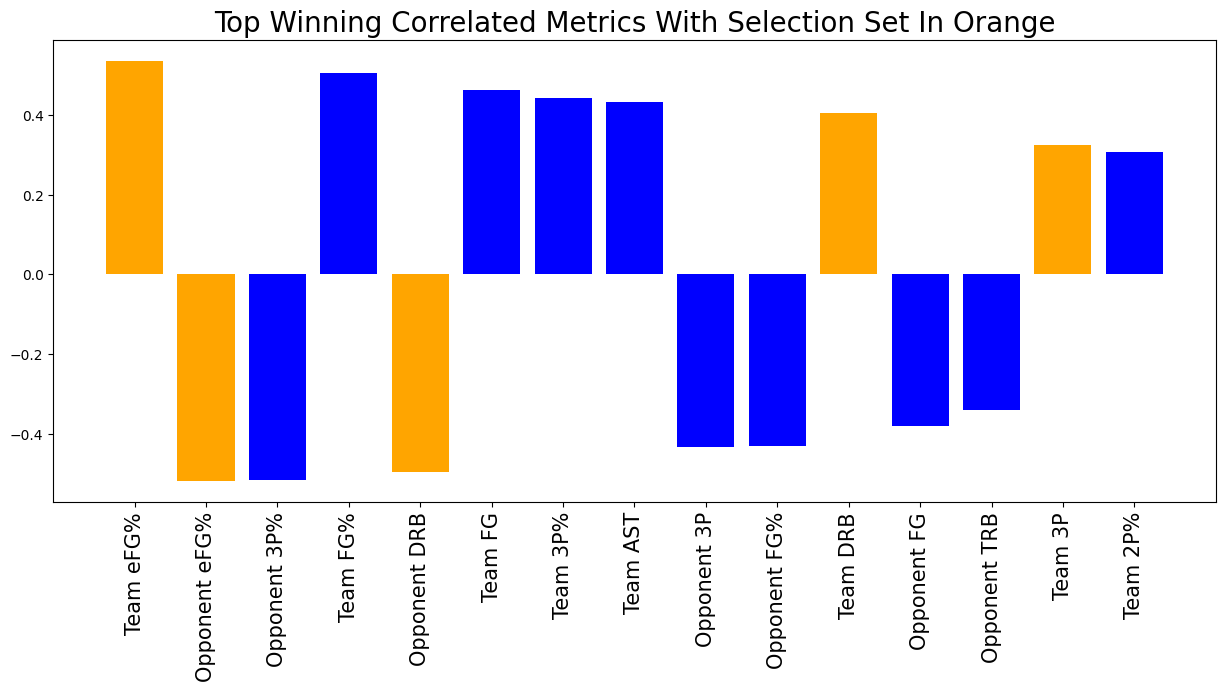

In [17]:
plt.figure(figsize = (15,6))
barcolors = ['orange' if col in ['Team eFG%', 'Opponent eFG%', 'Opponent DRB', 'Team DRB', 'Team 3P'] else 'blue' for col in CorrsDF['Col Name']]
plt.title("Top Winning Correlated Metrics With Selection Set In Orange", fontsize=20)
plt.bar(CorrsDF['Col Name'][:15], CorrsDF['Binary Corr'][:15], color = barcolors)
plt.xticks(rotation=90, fontsize = 15)
plt.show

In [ ]:
PowerTest = CorrsDF.iloc[:5,0]
PowerTest = PowerTest.tolist()
PowerTest

['Team eFG%', 'Opponent eFG%', 'Opponent 3P%', 'Team FG%', 'Opponent DRB']

## Collinearity of Predictor Variables

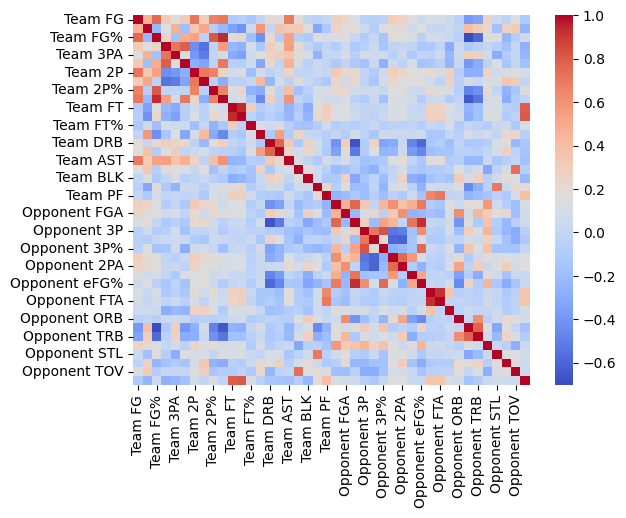

In [ ]:
correlation_matrix = ExpFrame.iloc[:,1: -2].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.show()

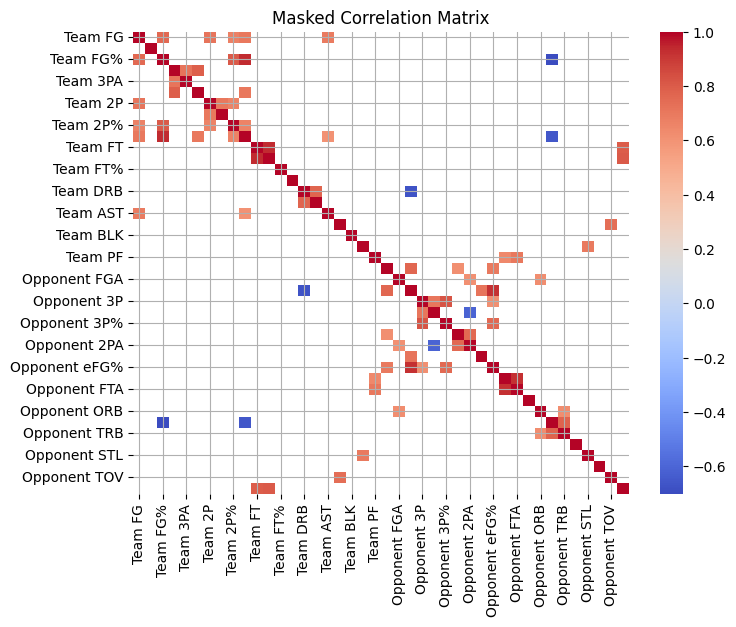

In [ ]:
threshold = 0.6

conditions = ((abs(correlation_matrix)>threshold))
filtered_matrix = correlation_matrix.where(conditions)

plt.figure(figsize=(8, 6))
# vizulize corr matrix
sns.heatmap(filtered_matrix, annot=False, cmap="coolwarm")
plt.title("Masked Correlation Matrix")
#plt.xticks(rotation=30)
plt.grid()
plt.show()

In [ ]:
#For looking at raw numbers
filtered_matrix

,Team FG,Team FGA,Team FG%,Team 3P,Team 3PA,Team 3P%,Team 2P,Team 2PA,Team 2P%,Team eFG%,...,Opponent FTA,Opponent FT%,Opponent ORB,Opponent DRB,Opponent TRB,Opponent AST,Opponent STL,Opponent BLK,Opponent TOV,Opponent PF
Team FG,1.000000,NaN,0.759812,NaN,NaN,NaN,0.716841,NaN,0.672757,0.703386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team FGA,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team FG%,0.759812,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.805296,0.938863,...,NaN,NaN,NaN,-0.702346,NaN,NaN,NaN,NaN,NaN,NaN
Team 3P,NaN,NaN,NaN,1.000000,0.718574,0.787912,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team 3PA,NaN,NaN,NaN,0.718574,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team 3P%,NaN,NaN,NaN,0.787912,NaN,1.000000,NaN,NaN,NaN,0.705509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team 2P,0.716841,NaN,NaN,NaN,NaN,NaN,1.000000,0.70598,0.661349,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team 2PA,NaN,NaN,NaN,NaN,NaN,NaN,0.705980,1.00000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team 2P%,0.672757,NaN,0.805296,NaN,NaN,NaN,0.661349,NaN,1.000000,0.665953,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team eFG%,0.703386,NaN,0.938863,NaN,NaN,0.705509,NaN,NaN,0.665953,1.000000,...,NaN,NaN,NaN,-0.656825,NaN,NaN,NaN,NaN,NaN,NaN


## Determining Relative Importance of these variables

In [18]:
#Select variables to estimate based on high correlation and lack of multi correlation
yName = 'Rslt Bin'

#Note not including team and opp scores for now
#xNames = ['Team eFG%', 'Team AST', 'Team DRB', 'Opponent eFG%', 'Opponent DRB'] #Old Data
xNames = ['Team eFG%', 'Opponent eFG%', 'Opponent DRB', 'Team DRB', 'Team 3P']

In [30]:
#Perform relative importance analysis
results = relativeImp(ExpFrame, outcomeName = yName, driverNames = xNames)
results = results.sort_values(by='rawRelaImpt', ascending=False).reset_index(drop=True)
results

,driver,rawRelaImpt,normRelaImpt
0,Opponent eFG%,0.171126,33.306076
1,Team eFG%,0.134581,26.193412
2,Opponent DRB,0.109557,21.323091
3,Team DRB,0.057208,11.134370
4,Team 3P,0.041325,8.043051


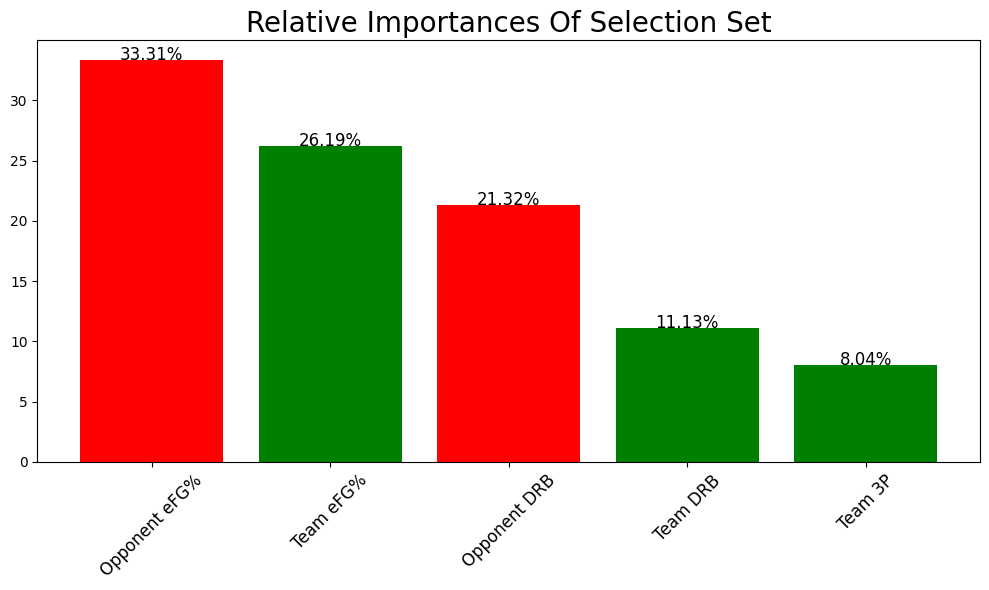

In [38]:
def add_labels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i], "{:.2f}%".format(y[i]), ha='center', fontsize = 12)

plt.figure(figsize=(10, 6))
plt.title("Relative Importances Of Selection Set", fontsize = 20)
plt.bar(results['driver'], results['normRelaImpt'], align="center",color = ['red','green','red','green','green'])
add_labels(results['driver'],results['normRelaImpt'])
plt.xticks(rotation=45, fontsize = 12)
plt.tight_layout()
plt.show()

In [ ]:
sum(results.rawRelaImpt)
#We have a good amount of impotance in this set

0.5137969368001488

In [ ]:
#Perform relative importance analysis on top indicators
results = relativeImp(ExpFrame, outcomeName = yName, driverNames = PowerTest)
results = results.sort_values(by='rawRelaImpt', ascending=False)
results

,driver,rawRelaImpt,normRelaImpt
1,Opponent eFG%,0.145662,27.827112
0,Team eFG%,0.108217,20.673671
2,Opponent 3P%,0.107350,20.508137
3,Team FG%,0.094342,18.022986
4,Opponent DRB,0.067882,12.968093


## Running a Logit on these Variables

In [ ]:
#First we need to normalize our variables for the logit
scaler = StandardScaler()
ScaledData = scaler.fit_transform(ExpFrame[xNames])
ScaledExpFrame = pd.DataFrame(ScaledData, columns = xNames)

In [ ]:
#Create a train test split
unique_seed = 1973
X_train, X_test, y_train, y_test = train_test_split(ScaledExpFrame[xNames], ExpFrame[yName], test_size = 0.2, random_state=unique_seed)

In [ ]:
#creating an instance for the logistic regression model
log_reg_single = LogisticRegression(random_state=unique_seed, max_iter=500)

#fitting the data from the trained data, independent and dependent variables
log_reg_single.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=1973)

In [ ]:
#generating predictions for the dependent variables based off of the independent test data
y_pred = log_reg_single.predict(X_test)
#generates the probabilities based off the positive class values for each instance in the test data
y_prob = log_reg_single.predict_proba(X_test)[:, 1]

In [ ]:
#creating a results dictionary and printing it
results = pd.DataFrame({
    'Win Predictions': y_pred,
    'Actual': y_test,
    'Probabilities': y_prob})

print(results)

    Win Predictions  Actual  Probabilities
44              1.0     1.0       0.867459
29              0.0     1.0       0.142181
2               0.0     0.0       0.376330
80              0.0     0.0       0.243550
37              1.0     1.0       0.754895
45              1.0     1.0       0.836597
46              1.0     1.0       0.947482
21              1.0     1.0       0.965188
67              0.0     0.0       0.098285
74              1.0     1.0       0.884671
65              1.0     0.0       0.670760
48              0.0     0.0       0.025233
23              1.0     1.0       0.912314
33              1.0     1.0       0.966143
36              0.0     0.0       0.187534
11              1.0     1.0       0.923145
13              1.0     1.0       0.974655


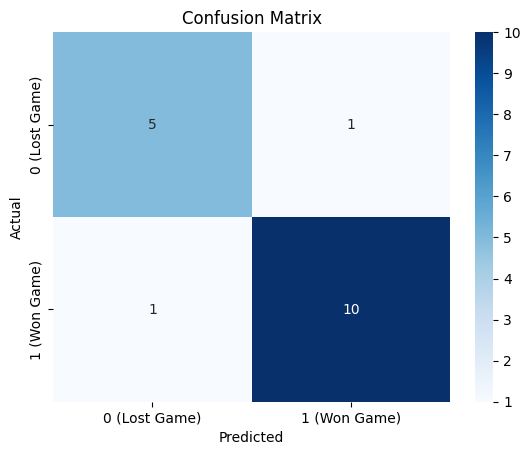

In [ ]:
#creating confusion matrix based off of the tested and predicted dependent variables
conf_matrix_single = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_single, annot=True, fmt="d", cmap="Blues",
            xticklabels=["0 (Lost Game)", "1 (Won Game)"],
            yticklabels=["0 (Lost Game)", "1 (Won Game)"])

# Add title and labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print("scikit-learn coefficients:", log_reg_single.coef_)
print("scikit-learn intercept:", log_reg_single.intercept_)

scikit-learn coefficients: [[ 0.96020184 -1.38043615 -0.6825951   0.19581817  0.22552394]]
scikit-learn intercept: [0.83506229]
